Zhu, Zhaoyang

1002321445

# Q1 {.unnumbered}
## a).  {.unnumbered}

>$L(c, \textbf{x} | \boldsymbol\theta ,\pi) = \prod_{c=0}^{9}(\pi_c \prod_{d=1}^{784}\theta^{x_d}_{cd}(1 - \theta_{cd})^{1 - x_d})$

>$log L = l_{mle} = \sum_{c=0}^{9}log(\pi_c) + \sum_{c=0}^{9}\sum_{d=1}^{784}(x_d)log(\theta_{cd}) + (1 - x_d)log(1 - \theta_{cd})$

> For fixed value of c = k:

>$\frac{dl}{d\theta_{kd}} = \sum_{c=0}^{9}\sum_{d=1}^{784}(x_d)\frac{I(c = k)}{\theta_{cd}} - (1 - x_d)\frac{I(c = k)}{1 - \theta_{cd}}$

>$= \sum_{d=1}^{784}\sum_{c=0}^{9} I(x_d = 1)\frac{I(c = k)}{\theta_{cd}} - (1 - I(x_d = 1))\frac{I(c = k)}{1 - \theta_{cd}}$

> For fixed value of d = j:

>$\implies \frac{dl}{d\theta_{kj}} = \frac{\sum_{d=1}^{784} I(x_d = 1)I(c = k)}{\theta_{kj}} - \frac{\sum_{d=1}^{784} (1 - I(x_d = 1))I(c = k)}{1 - \theta_{kj}}  = 0$

>$\implies \frac{1}{\hat\theta_{kj}} = \frac{\sum_{d=1}^{784} (1 - I(x_d = 1))I(c = k) + \sum_{d=1}^{784} I(x_d = 1)I(c = k)}{\sum_{d=1}^{784} I(x_d = 1)I(c = k)}$

>$\implies \hat\theta_{kj} = \frac{\sum_{d=1}^{784} I(x_d = 1) I(c = k)}{\sum_{d=1}^{784} I(c = k)}$

>$\implies \hat\theta_{kj} = \frac{\sum_{d=1}^{784} I(x_d = 1 \land c = k)}{\sum_{d=1}^{784} I(c = k)}$


## b). {.unnumbered}

>$\pi (\boldsymbol\theta) = Beta(2,2) = constant*(\theta_{cd}(1 - \theta_{cd}))$

>$L(c, \textbf{x} | \boldsymbol\theta ,\pi) = \prod_{c=0}^{9}(\pi_c \prod_{d=1}^{784}\theta^{x_d}_{cd}(1 - \theta_{cd})^{1 - x_d})$

>$\implies \pi (\theta, \pi | \textbf{x}, c) \propto \pi(\boldsymbol\theta)L(c, \textbf{x} | \boldsymbol\theta ,\pi)$

>$l_{map} = log (\pi (\theta, \pi | c, \textbf{x})) = log(\pi(\boldsymbol\theta)) + l_{mle}$

>$\implies l_{map} = log(\theta_{cd}) + log(1 - \theta_{cd}) + l_{mle}$

>For fixed value of c = k and d = j:

>$\implies \frac{dl_{map}}{d\theta_{kj}} = \frac{1}{\theta_{kj}} - \frac{1}{1 - \theta_{kj}} + \frac{\sum_{d=1}^{784} I(x_d = 1)I(c = k)}{\theta_{kj}} - \frac{\sum_{d=1}^{784} (1 - I(x_d = 1))I(c = k)}{1 - \theta_{kj}} = 0$

>$\implies \frac{1}{\hat\theta_{kj}} = \frac{2 + \sum_{d=1}^{784} (1 - I(x_d = 1))I(c = k) + \sum_{d=1}^{784} I(x_d = 1)I(c = k)}{1 +\sum_{d=1}^{784} I(x_d = 1)I(c = k)}$

>$\implies \hat\theta_{kj} = \frac{1 + \sum_{d=1}^{784} I(x_d = 1 \land c = k)}{2 + \sum_{d=1}^{784} I(c = k)}$



## c). {.unnumbered}


In [1]:
from __future__ import absolute_import
from __future__ import print_function
from future.standard_library import install_aliases
install_aliases()

import numpy as np
import os
import gzip
import struct
import array
from scipy.stats import multivariate_normal
from autograd import grad
from scipy.misc import logsumexp as lse
import matplotlib.pyplot as plt
import matplotlib.image
from urllib.request import urlretrieve
%matplotlib inline

def download(url, filename):
    if not os.path.exists('data'):
        os.makedirs('data')
    out_file = os.path.join('data', filename)
    if not os.path.isfile(out_file):
        urlretrieve(url, out_file)


def mnist():
    base_url = 'http://yann.lecun.com/exdb/mnist/'

    def parse_labels(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data = struct.unpack(">II", fh.read(8))
            return np.array(array.array("B", fh.read()), dtype=np.uint8)

    def parse_images(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data, rows, cols = struct.unpack(">IIII", fh.read(16))
            return np.array(array.array("B", fh.read()),
                            dtype=np.uint8).reshape(num_data, rows, cols)

    for filename in ['train-images-idx3-ubyte.gz',
                     'train-labels-idx1-ubyte.gz',
                     't10k-images-idx3-ubyte.gz',
                     't10k-labels-idx1-ubyte.gz']:
        download(base_url + filename, filename)

    train_images = parse_images('data/train-images-idx3-ubyte.gz')
    train_labels = parse_labels('data/train-labels-idx1-ubyte.gz')
    test_images  = parse_images('data/t10k-images-idx3-ubyte.gz')
    test_labels  = parse_labels('data/t10k-labels-idx1-ubyte.gz')

    return train_images, train_labels, test_images, test_labels


def load_mnist():
    partial_flatten = lambda x : np.reshape(x, (x.shape[0], np.prod(x.shape[1:])))
    one_hot = lambda x, k: np.array(x[:,None] == np.arange(k)[None, :], dtype=int)
    train_images, train_labels, test_images, test_labels = mnist()
    train_images = partial_flatten(train_images) / 255.0
    test_images  = partial_flatten(test_images)  / 255.0
    train_labels = one_hot(train_labels, 10)
    test_labels = one_hot(test_labels, 10)
    N_data = train_images.shape[0]

    return N_data, train_images, train_labels, test_images, test_labels


def plot_images(images, ax, ims_per_row=5, padding=5, digit_dimensions=(28, 28),
                cmap=matplotlib.cm.binary, vmin=None, vmax=None):
    """Images should be a (N_images x pixels) matrix."""
    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = np.min(images.ravel())
    concat_images = np.full(((digit_dimensions[0] + padding) * N_rows + padding,
                             (digit_dimensions[1] +
                              padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], digit_dimensions)
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + digit_dimensions[0]) * row_ix
        col_start = padding + (padding + digit_dimensions[1]) * col_ix
        concat_images[row_start: row_start + digit_dimensions[0],
                      col_start: col_start + digit_dimensions[1]] = cur_image
    cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    return cax


def save_images(images, filename, **kwargs):
    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)
    plot_images(images, ax, **kwargs)
    fig.patch.set_visible(False)
    ax.patch.set_visible(False)
    plt.savefig(filename)
    


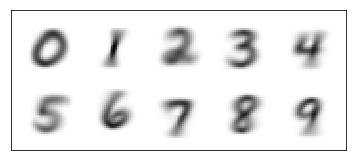

In [2]:
# binarilize our data into 1 and 0
def binarilize(x):
    n, d = x.shape
    for i in range(n):
        for j in range(d):
            if x[i][j] >= 0.5:
                x[i][j] = 1
            else:
                x[i][j] = 0
    return x   

#Q1 d
# the input x is a vector of pixels
# the input theta is a c by d matrix
# calculate the log likelihood for single training image
def naive_loglik(x, pi_c, theta, label):
    pi = np.array([pi_c]*10)
    result = 0
    for c in range(len(theta)):
        if label[c] != 1:
            result += np.log(pi[c])
            for d in range(len(x)):
                result += x[d] * np.log(theta[c][d]) + \
                np.log(1 - theta[c][d]) * (1 - x[d])
    return -result

# get average log likelihood
def get_ave_loglik(x, y, theta, pi_c):
    total = 0
    for n in range(len(x)):
        total += naive_loglik(x[n], pi_c, theta, y[n])
    return total/len(x)


# the input x is a matrix n by d
# the input y is a matrix n by c
# fit using MAP estimate
def map_fit(x, y):
    theta = np.zeros((10, 784))
    for c in range(10):
        for d in range(784):
            theta[c][d] = (1 + np.sum(np.where((x[:, d] == 1) & (y[:, c] == 1),
                 1, 0)))/ (2 + np.sum(y[:, c]))
       
    return theta

num, x_train, y_train, x_test, y_test = load_mnist()
x_train = binarilize(x_train)
x_test = binarilize(x_test)
theta = map_fit(x_train, y_train)
fig = plt.figure(1)
fig.clf()
ax = fig.add_subplot(111)
plot_images(theta, ax)  




## d). {.unnumbered}

>$p(c | \textbf{x}, \boldsymbol\theta, \pi)p(\textbf{x}, \boldsymbol\theta, \pi) = p(\textbf{x}, \boldsymbol\theta, \pi, c)$

>$\implies p(c | \textbf{x}, \boldsymbol\theta, \pi) = \frac{p(\textbf{x}, \boldsymbol\theta, \pi, c)}{p(\textbf{x}, \boldsymbol\theta, \pi)} = \frac{p(\textbf{x}, c | \boldsymbol\theta, \pi)}{p(\textbf{x} | \boldsymbol\theta, \pi)} = \frac{p(\textbf{x}, c | \boldsymbol\theta, \pi)}{\sum_{c=0}^{9}p(\textbf{x}, c| \boldsymbol\theta, \pi)}$

>$\implies p(c | \textbf{x}, \boldsymbol\theta, \pi) = \frac{\pi_c \prod_{d=1}^{784}\theta^{x_d}_{cd}(1 - \theta_{cd})^{1 - x_d}}{\sum_{c=0}^{9}\pi_c \prod_{d=1}^{784}\theta^{x_d}_{cd}(1 - \theta_{cd})^{1 - x_d}}$

>$\implies log(p(c | \textbf{x}, \boldsymbol\theta, \pi)) = log(\pi_c) + \sum_{d=1}^{784} x_d log(\theta_{cd}) + (1 - x_d)log(1 - \theta_{cd}) - \sum_{c=0}^9 (log(\pi_c) + \sum_{d=1}^{784} x_d log(\theta_{cd}) + (1 - x_d)log(1 - \theta_{cd}))$

>$\implies log(p(c | \textbf{x}, \boldsymbol\theta, \pi)) = - \sum_{i=0, i\neq c}^9 (log(\pi_i) + \sum_{d=1}^{784}(x_d) log(\theta_{id}) + log(1 - \theta_{id})(1 - x_d))$




## e). {.unnumbered}



In [3]:
# 1E
# input pi is a pre defined probability.
# input x is a vector
def naive_predict(x, theta, pi_c):
    probability = []
    pi = [pi_c]*10
    for c in range(len(theta)):
        product = 1
        for d in range(len(x)):
            product = product * theta[c][d]**x[d]*(1 - theta[c][d])**(1 - x[d])
        probability.append(product * pi[c])
    return np.argmax(probability)

# ave log likelihood on part of the data
train_ave_loglik = get_ave_loglik(x_train[0:10000], y_train[0:10000], theta, 0.1)
test_ave_loglik = get_ave_loglik(x_test, y_test, theta, 0.1)

# predict on the test set use part of the test data
prediction_test = []
for n in range(len(x_test)):
    prediction_test.append(naive_predict(x_test[n], theta, 0.1))
prediction_train = []
for n in range(len(x_train)):
    prediction_train.append(naive_predict(x_train[n], theta, 0.1))
accuracy_test = 0
for i in range(len(prediction_test)):
    if prediction_test[i] == np.argmax(y_test[i]):
        accuracy_test += 1
accuracy_test = accuracy_test/len(prediction_test)
accuracy_train = 0
for i in range(len(prediction_train)):
    if prediction_train[i] == np.argmax(y_train[i]):
        accuracy_train += 1
accuracy_train = accuracy_train/len(prediction_train)
print("The test accuracy is %s, The train accuracy is %s."%\
      (accuracy_test, accuracy_train))
print("The average log likelihood for test set is %s, for training set is %s."%\
      (np.round(test_ave_loglik, 2), np.round(train_ave_loglik, 2)))

The test accuracy is 0.8426, The train accuracy is 0.8358833333333333.
The average log likelihood for test set is 2433.1, for training set is 2433.49.



## Q2{.unnumbered}

## a). {.unnumbered}

True

## b). {.unnumbered}

False


## c). {.unnumbered}

The random images are [4 1 5 0 0 8 0 5 1 1].


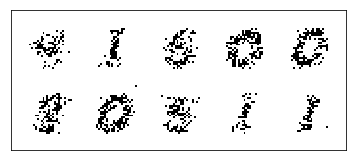

In [4]:
#sample from c
random_c = np.random.randint(0, 9, 10)
random_picture = np.zeros((10, 784))
for i in range(10):
    for j in range(784):
        random_picture[i][j] = np.random.binomial(1, theta[random_c[i]][j])

fig = plt.figure(2)
fig.clf()
ax = fig.add_subplot(111)
plot_images(random_picture, ax)
print("The random images are %s."%(random_c))

## d). {.unnumbered}

>$p(x_{i \in bot} | \textbf{x}_{top}, \boldsymbol\theta ,\pi) = \sum_{c=0}^{9} p(x_{i \in bot}, c| \textbf{x}_{top}, \boldsymbol\theta_c , \pi_c)$

>$=\sum_{c=0}^{9} \frac{p(x_{i \in bot}, c, \textbf{x}_{top}| \boldsymbol\theta_c ,\pi_c)}{p(\textbf{x}_{top} | \boldsymbol\theta_c ,\pi_c)}$

>$=\sum_{c=0}^{9} \frac{\prod_{d=1}^{382}\theta^{x_d}_{cd}(1 - \theta_{cd})^{1 - x_d} \theta^{x_i}_{ci}(1 - \theta_{ci})^{1 - x_i}\pi_c}{\prod_{d=1}^{382}\theta^{x_d}_{cd}(1 - \theta_{cd})^{1 - x_d}}$

>$\implies p(x_{i \in bot} | \textbf{x}_{top}, \boldsymbol\theta ,\pi) = \sum_{c=0}^{9} \theta^{x_i}_{ci}(1 - \theta_{ci})^{1 - x_i}\pi_c$


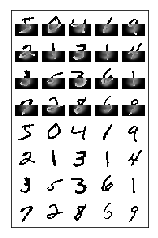

In [5]:
def bot_part(x, theta, pi_c):
    bot_image = np.zeros(392)
    bot = x[392:]
    for d in range(392):
        result = 0
        for c in range(10):
            result += theta[c][d + 392]**bot[d] * \
            (1 - theta[c][d + 392])**(1 - bot[d]) * pi_c
        bot_image[d] = result
    return np.concatenate((x[:392], bot_image))


new_image = x_train.copy()
new_image = new_image[:20]
for i in range(len(new_image)):
    new_image[i] = bot_part(new_image[i], theta, 0.1)
    

fig = plt.figure(3)
fig.clf()
ax = fig.add_subplot(111)
plot_images(np.concatenate((new_image, x_train[0:20]), axis = 0), ax)  

## Q3 {.unnumbered}

## a). {.unnumbered}

>w is a 10 by 784 matrix = 7840 parameters

## b). {.unnumbered}

>Let $\textbf{w} = [w_1, w_2, ... , w_c]^T $

>$\triangledown_{w_c} log(p(c | \textbf{x}\textbf{w})) = x - \frac{xe^{w_c^T \textbf{x}}}{\sum_{c^{\prime}= 0}^{9}e^{w_{c^\prime}^T \textbf{x}}}$

## c). {.unnumbered}

In [6]:
# the input w is a matrix
def logistic_likelihood(x, index, w):
    bot = 0
    item = []
    for c in range(len(w)):
        item.append(np.dot(w[c].T, x))
    b = max(item)
    for c in range(len(w)):
        bot += np.exp(item[c] - b)
    bot = b + np.log(bot)
    return item[index] - bot


# the input x is a vector
# the inmput w is the matrix of w    
# conduct gradient ascent for one training image        
def single_gradient(x, c, w, iteration, lr, cr=0.001):
    this_w = w
    this_likelihood = logistic_likelihood(x, c, w)
    diff = 1000
    like = []
    while (iteration > 0) & (diff > cr):
        bot = 0
        next_w = this_w
        for i in range(10):
            bot += np.exp(np.dot(w[i].T, x))
        next_w[c] = this_w[c] + lr * \
        (x - x * np.exp((np.dot(this_w[c].T, x))) / bot)
        this_w = next_w
        old_likelihood = this_likelihood
        this_likelihood = logistic_likelihood(x, c, this_w)
        diff = np.abs(old_likelihood - this_likelihood)
        iteration -= 1
        like.append(old_likelihood)
    return this_w, like[-1]

# gradient ascent
def gradient_ascent(x, y, stepsize, iterations):
    w = np.zeros((10, 784))
    likelihood = []
    for n in range(len(x)):
        index = np.argmax(y[n])
        result = single_gradient(x[n], index, w, iterations, stepsize)
        w = result[0]
        likelihood.append(result[1])
    return w, likelihood

## d). {.unnumbered}

Compare with naive bayes, our accuracy on test set is higher. At the same time, if we spend sometime tuning the hyperparameter stepsize, we can increase our accuracy. Meanwhile, the average log likelihood is much lower than naive bayes classifier.

In [18]:
def logistic_predict(x, w):
    probability = []   
    bot = 0
    for c in range(len(w)):
        bot += np.exp(np.dot(w[c].T, x))
    for c in range(len(w)):
        probability.append(np.exp(np.dot(w[c].T, x)) / bot)
    return np.argmax(probability)

w, logistic_like = gradient_ascent(x_train, y_train, 0.00006, 100)
ave_logistic_like_train = np.sum(logistic_like) / len(x_train)

# average log likelihood on test set
ave_logistic_like_test = []
for n in range(len(x_test)):
    c = np.argmax(y_test[n])
    ave_logistic_like_test = logistic_likelihood(x_test[n], c, w)
ave_logistic_like_test = np.sum(ave_logistic_like_test) / len(x_test)

# accuracy on test set
l_prediction = []
for n in range(len(x_test)):
    l_prediction.append(logistic_predict(x_test[n], w))
l_accuracy = 0
for i in range(len(l_prediction)):
    if l_prediction[i] == np.argmax(y_test[i]):
        l_accuracy += 1
l_accuracy = l_accuracy/len(l_prediction)  

# accuracy on training set
lt_prediction = []
for n in range(len(x_train)):
    lt_prediction.append(logistic_predict(x_train[n], w))
lt_accuracy = 0
for i in range(len(lt_prediction)):
    if lt_prediction[i] == np.argmax(y_train[i]):
        lt_accuracy += 1
lt_accuracy = lt_accuracy/len(lt_prediction)  
print("The average likelihood on training set is %s, on test set is %s."%\
      (np.round(ave_logistic_like_train, 2), ave_logistic_like_test))
print("The accuracy on test set is %s, on training set is %s."%\
      (np.round(l_accuracy, 2), np.round(lt_accuracy, 2))) 


The average likelihood on training set is -0.62, on test set is -2.1299229047144762e-14.
The accuracy on test set is 0.86, on training set is 0.86.


## Q4 {.unnumbered}

## a). {.unnumbered}


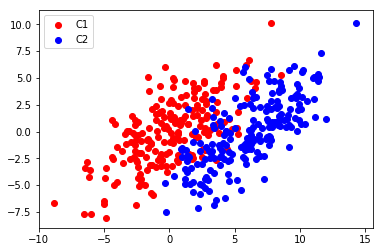

In [8]:
mu1 = np.array([0.1, 0.1])
mu2 = np.array([6, 0.1])
sigma = np.array([10, 7, 7, 10]).reshape(2, 2)
c1 = np.random.multivariate_normal(mu1, sigma, 200)
c2 = np.random.multivariate_normal(mu2, sigma, 200)
plt.figure()
plt.scatter(c1[:, 0], c1[:, 1], c='red', label='C1')
plt.scatter(c2[:, 0], c2[:, 1], c='blue', label='C2')
plt.legend()

## b). {.unnumbered}

k mean misclassification rate is 0.31


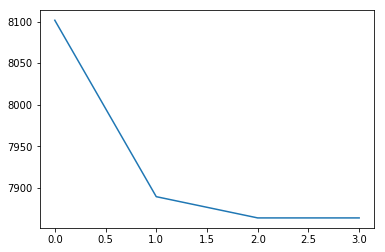

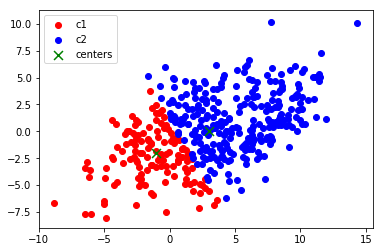

In [9]:
def cost(mu, x, r):
    c = 0
    for n in range(0, len(x)):
        for k in range(0, len(mu)):
            c += r[n][k]*(np.linalg.norm(x[n] - mu[k]))**2
    return c


def km_e_step(x, mu, r):
    for n in range(0, len(x)):
        distance = []
        for k in range(0, len(mu)):
            distance.append(np.linalg.norm(x[n] - mu[k])**2)
        closet = np.argmin(distance)
        for k in range(0, len(mu)):
            if k == closet:
                r[n][k] = 1
            else:
                r[n][k] = 0
    return r


def km_m_step(x, r, mu):
    top = np.zeros(mu.shape[1])
    bot = 0
    for k in range(0, len(mu)):
        for n in range(0, len(x)):
            top += r[n][k] * x[n]
            bot += r[n][k]
        mu[k] = top/bot
    return mu


def k_mean(k, x, mu, iterations, cr):
    r_init = np.zeros(len(x)*k).reshape(len(x), k)
    mu_init = mu
    diff = 100
    iteration = 1
    cost_list = []
    while (iteration > 0) & (diff > cr):
        if iteration == 1:
            iteration = iterations
            new_r = km_e_step(x, mu_init, r_init)
            new_mu = km_m_step(x, r_init, mu_init)
            this_cost = cost(new_mu, x, new_r)
            previous_cost = this_cost
            diff = previous_cost
        else:
            new_r = km_e_step(x, new_mu, new_r)
            new_mu = km_m_step(x, new_r, new_mu)
            previous_cost = this_cost
            this_cost = cost(new_mu, x, new_r)
            diff = previous_cost - this_cost
        cost_list.append(this_cost)
        iteration -= 1
    return cost_list, new_r, new_mu


# c_1 is the class_one predicted
# c_2 is the class_two predicted
# t_1 is the true class_one 
# t_2 is the true class_two
def misclassification_rate(c_1, c_2, t_1, t_2):
    misclassification = 0
    for i in c_1:
        if i in t_2:
            misclassification += 1
    for i in c_2:
        if i in t_1:
            misclassification += 1
    misclassification_rate = misclassification/(len(c_1) + len(c_2))
    return misclassification_rate

# assign class to EM algorithm or K-mean 
def assign_class(x, result, em = False):
    if em:
        responsibility = result[1]
        log_lik = result[0]
        plt.figure()                 
        plt.plot(log_lik)
        em_class_one = np.array([])
        em_class_two = np.array([])
        # assign points to the class with larger responsibility
        for i in range(0, len(x)):
            if responsibility[i][0] >= responsibility[i][1]:
                em_class_one = np.concatenate((em_class_one, x[i]))
            else:
                em_class_two = np.concatenate((em_class_two, x[i]))

        em_class_one = em_class_one.reshape(len(em_class_one)//2, 2)
        em_class_two = em_class_two.reshape(len(em_class_two)//2, 2)   
        plt.figure()                                
        plt.scatter(em_class_one[:, 0], em_class_one[:, 1], c="red", label="c1")
        plt.scatter(em_class_two[:, 0], em_class_two[:, 1], c="blue", label="c2")   
        plt.legend()
        return em_class_one, em_class_two
    else:
        plt.figure()
        total_cost = result[0]
        plt.plot(total_cost)
        plt.figure()
        r = result[1]
        new_mu = result[2]
        class_1 = np.array([])
        class_2 = np.array([])
        for i in range(0, r.shape[0]):
            if r[i][0] == 1:
                class_1 = np.concatenate((class_1, x[i]))
            else:
                class_2 = np.concatenate((class_2, x[i]))
        class_1 = class_1.reshape(len(class_1)//2, 2)
        class_2 = class_2.reshape(len(class_2)//2, 2)
        plt.scatter(class_1[:, 0], class_1[:, 1], c="red", label="c1")
        plt.scatter(class_2[:, 0], class_2[:, 1], c="blue", label="c2")
        plt.scatter(new_mu[:, 0], new_mu[:, 1], c="green", marker='x', 
                    label="centers", s=80)  
        plt.legend()
        return class_1, class_2

init_mu1 = np.array([0, 0])
init_mu2 = np.array([1, 1])
x = np.concatenate((c1, c2))
mu = np.concatenate((init_mu1, init_mu2)).reshape(2, 2)
result = k_mean(2, x, mu, 20, 0.0001)
class_1, class_2 = assign_class(x, result)
k_mean_mr = misclassification_rate(class_1, class_2, c1, c2)
print("k mean misclassification rate is %s"%(k_mean_mr))



## c). {.unnumbered}


K mean misclassification rate is 0.31, EM misclassification rate is 0.1025


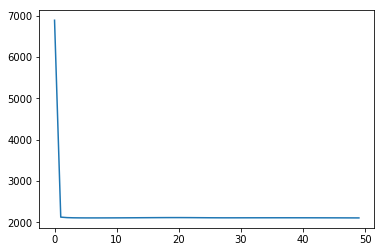

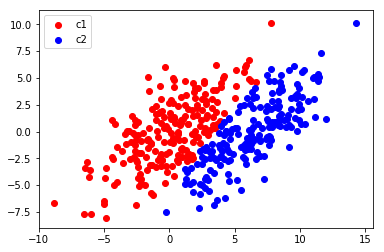

In [10]:
def normal_density(x, mu, sigma):
    return multivariate_normal.pdf(x, mu, sigma)
    

# the input sigma is a list
def log_likelihood(x, pi, mu, sigma):
    result = 0
    for i in range(0, len(x)):
        loss = 0
        for k in range(0, len(mu)):
            loss += pi[k] * normal_density(x[i], mu[k], sigma[k])
        result += np.log(loss)
    return result


def em_e_step(x, mu, sigma, pi, bot):
    top = pi * normal_density(x, mu, sigma)
    return top/bot

# the input gamma = Gamma[:,k]
def em_m_step(x, gamma):
    n_k = np.sum(gamma)
    mu_k = 0
    sigma_k = 0
    for n in range(0, len(gamma)):
        mu_k += gamma[n] * x[n]
    mu_k = mu_k / n_k
    for n in range(0, len(gamma)):
        ys = (x[n] - mu_k).reshape(2,1)
        sigma_k += gamma[n] * np.dot(ys, ys.T)
    sigma_k = sigma_k / n_k
    pi_k = n_k/ len(x)
    return mu_k, sigma_k, pi_k
        
        
    
# the input sigma is a list, cr is a small number
# the input mu is a list
# the input pi is list

def em_algo(x, mu, sigma, pi, iteration, cr):
    diff = 100
    gamma = np.zeros((len(x), len(pi)))
    loglik = []
    new_mu = mu
    new_sigma = sigma
    new_pi = pi
    old_loglik = log_likelihood(x, new_pi, new_mu, new_sigma)
    while (iteration > 0) & (diff > cr):
        # E-Step
        for n in range(0, len(x)):
            bot = 0
            for k in range(0, len(pi)):
                bot += pi[k] * normal_density(x[n], new_mu[k],
                            new_sigma[k])
                    
            for k in range(0, len(pi)):
                gamma[n][k] = em_e_step(x[n], new_mu[k],
                        new_sigma[k], new_pi[k], bot)
        new_mu = []
        new_pi = []
        new_sigma = []
        # M-setp
        for k in range(0, len(pi)):
            result_k = em_m_step(x, gamma[:, k])
            new_mu.append(result_k[0])
            new_pi.append(result_k[2])
            new_sigma.append(result_k[1])
        
        this_loglik = log_likelihood(x, new_pi, new_mu, new_sigma)
        # calculate the log-likelihood and check convergence
        diff = np.abs(old_loglik - this_loglik)
        loglik.append(-old_loglik)
        iteration -= 1
        old_loglik = this_loglik        
    return (loglik, gamma)
                    
combined_mu = [init_mu1, init_mu2]
covariance = [np.array([[1,0], [0, 1]]), np.array([[1,0], [0, 1]])]
pi = [0.5, 0.5]
em_result = em_algo(x, combined_mu, covariance, pi, 50, 0.01)
em_class_one, em_class_two = assign_class(x, em_result, em=True)
em_mr = misclassification_rate(em_class_one, em_class_two, c1, c2)
print("K mean misclassification rate is %s, EM misclassification rate is %s"\
      %(k_mean_mr, em_mr))


## d). {.unnumbered}

From the above graphs we can see that, k-mean converges faster thanEM algorithm, but EM algorithm performs much better for this data. 


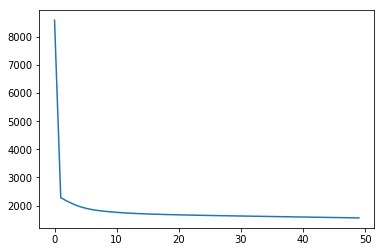

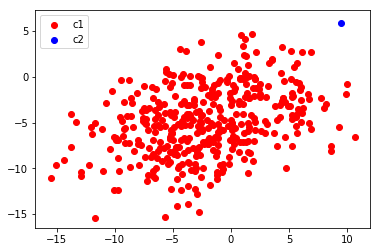

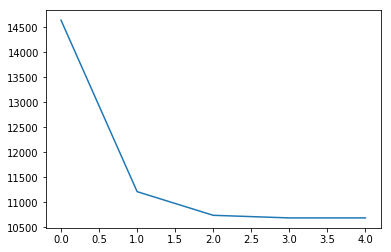

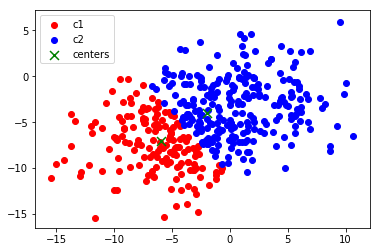

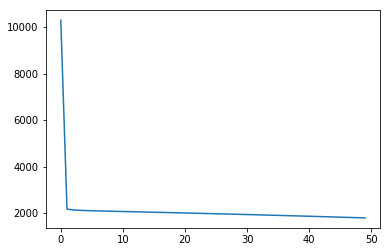

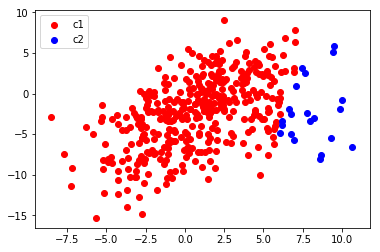

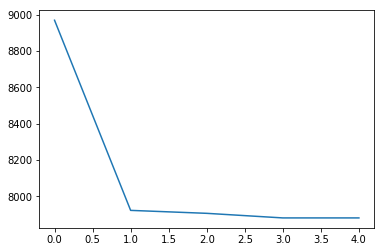

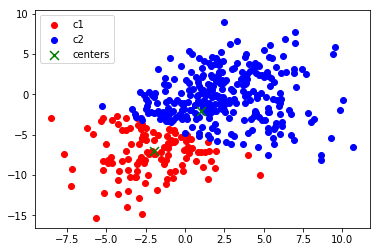

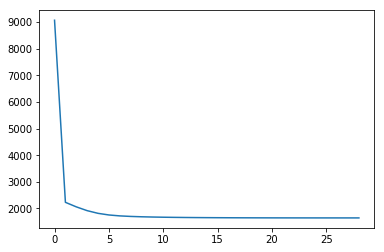

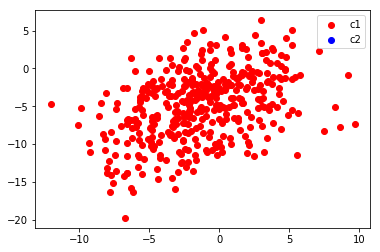

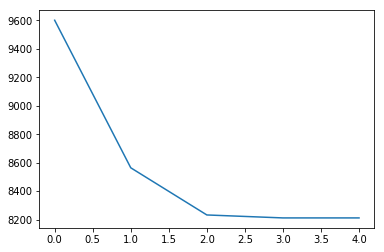

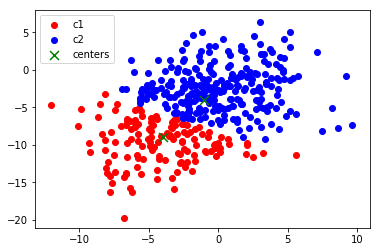

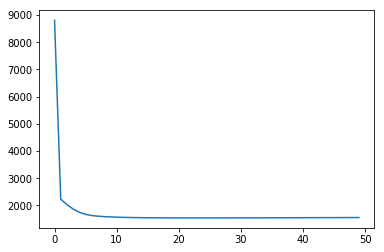

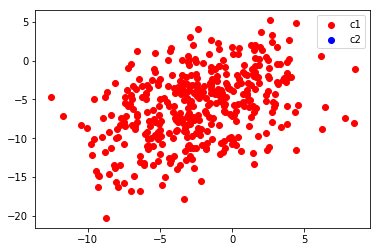

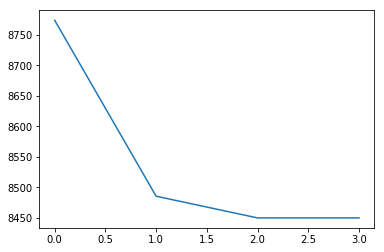

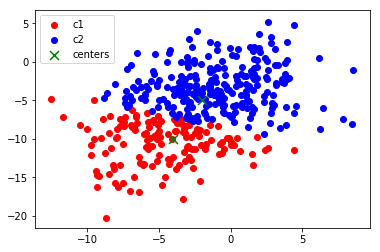

In [13]:

#4 d).
# From the above graphs we can see that, k-mean converges faster than
# EM algorithm, but EM algorithm performs much better for this data. 
# Try data with different starting point

realization_k = []
realization_e = []
init_mu1 = np.array([-5, -5])
init_mu2 = np.array([10, 5])
em_mu = [init_mu1, init_mu2]
k_mu = np.concatenate((init_mu1, init_mu2)).reshape(2,2)
k_result = k_mean(2, x, k_mu, 20, 0.000001)
em_result = em_algo(x, em_mu, covariance, pi, 50, 0.1)
em_class_one, em_class_two = assign_class(x, em_result, em=True)
k_class_one, k_class_two = assign_class(x, k_result)
realization_k.append(misclassification_rate(k_class_one,\
                                            k_class_two, c1, c2))
realization_e.append(misclassification_rate(em_class_one,\
                                            em_class_two, c1, c2))
# new data
mu = np.random.random(2)
c1 = np.random.multivariate_normal(mu, sigma, 200)
c1 = np.random.multivariate_normal(mu, sigma, 200)
x = np.concatenate((c1, c2))
k_result = k_mean(2, x, k_mu, 20, 0.000001)
em_result = em_algo(x, em_mu, covariance, pi, 50, 0.01)
em_class_one, em_class_two = assign_class(x, em_result, em=True)
k_class_one, k_class_two = assign_class(x, k_result)
realization_k.append(misclassification_rate(k_class_one,\
                                            k_class_two, c1, c2))
realization_e.append(misclassification_rate(em_class_one,\
                                            em_class_two, c1, c2))

# new data + some random noise [5, 0)
for i in range(len(c1)):
    c1[i] = c1[i] + 5 * np.random.random_sample(2) - 5
for i in range(len(c2)):
    c2[i] = c2[i] + 5 * np.random.random_sample(2) - 5
x = np.concatenate((c1, c2))

k_result = k_mean(2, x, k_mu, 20, 0.000001)
em_result = em_algo(x, em_mu, covariance, pi, 50, 0.01)
em_class_one, em_class_two = assign_class(x, em_result, em=True)
k_class_one, k_class_two = assign_class(x, k_result)
realization_k.append(misclassification_rate(k_class_one,\
                                            k_class_two, c1, c2))
realization_e.append(misclassification_rate(em_class_one,\
                                            em_class_two, c1, c2))

# new data + some random noise [5, 0)
for i in range(len(c1)):
    c1[i] = c1[i] + 2 * np.random.random_sample(2) - 2
for i in range(len(c2)):
    c2[i] = c2[i] + 2 * np.random.random_sample(2) - 2
x = np.concatenate((c1, c2))

k_result = k_mean(2, x, k_mu, 20, 0.000001)
em_result = em_algo(x, em_mu, covariance, pi, 50, 0.01)
em_class_one, em_class_two = assign_class(x, em_result, em=True)
k_class_one, k_class_two = assign_class(x, k_result)
realization_k.append(misclassification_rate(k_class_one,\
                                            k_class_two, c1, c2))
realization_e.append(misclassification_rate(em_class_one,\
                                            em_class_two, c1, c2))



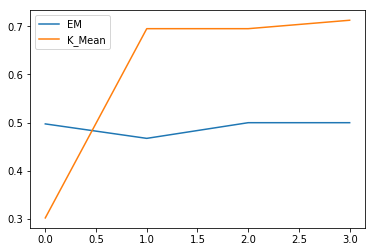

In [15]:
plt.figure()
plt.plot(realization_e, label="EM")
plt.plot(realization_k, label="K_Mean")
plt.legend()

From our realization of different data, we can see that EM algorithm performs best when we know the data is from gaussian distribution. It may perform terrible in some senarios, but overall it performs better than K-mean algorithms.